<a href="https://www.kaggle.com/code/nainapandey96/gradient-descent-implementation?scriptVersionId=94643004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#This is the implementaion of Gradient Descent: Batch, Stochastic, Mini
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_housing=pd.read_csv('../input/housing/housing.csv')
df_housing.head()

,Area,Bedroom,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
#Scaling data 
from sklearn import preprocessing
sx= preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_x= sx.fit_transform(df_housing.drop('price', axis=1))
scaled_y=sy.fit_transform(df_housing['price'].values.reshape(-1,1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [4]:
#Batch Gradient Descent
def gradient_descent(x,y,epochs, learning_rate=0.01):
    
    number_of_features=x.shape[1]
    w = np.ones(shape=(number_of_features))#weights
    b=0 #bias
    total_samples= x.shape[0] # number of rows in X
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_pred=np.dot(w, x.T) + b
        #derivative
        w_grad = -(2/total_samples)*(x.T.dot(y-y_pred))
        b_grad = -(2/total_samples)*np.sum(y-y_pred)
        
        #adjusting weights and bias using derivatives
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost=np.mean(np.square(y-y_pred)) #cost is mean squared error
        #We need to save the cost and epoch value of some iterations so we can plot the graph. We will go with every 10th value. 
        #The values will get added to the cost and epoch list we made
        if i %10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    #Return the weight, bias , cost list, and epoch list        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost
    

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

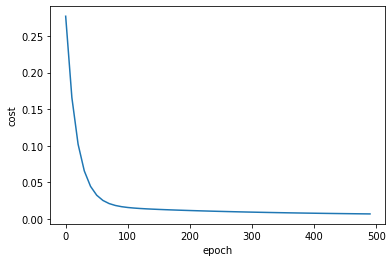

In [5]:
#Plotting cost vs epoch for Batch Gradient Descent
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [6]:
#Prediction 
def predict(Area,Bedroom,w,b):
    scaled_X = sx.transform([[Area, Bedroom]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600,4,w,b)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

In [7]:
#We will use Random to select one record from our dataset
#Stochastic Gradient Descent
import random
def SGD(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71138186, 0.67824327]), -0.23197159150711485, 0.0003218722734739126)

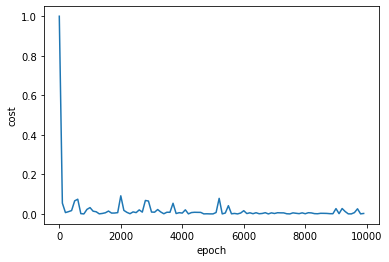

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [9]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),epochs = 120,batch_size = 5)
w, b, cost

(array([0.71007532, 0.67807627]), -0.23344769616299482, 0.00215137066993471)

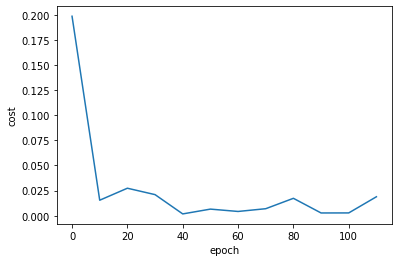

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)